In [11]:
import requests as rq
import json
import pandas as pd
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)
import numpy as np
from textwrap import wrap
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from TCGA_files import *
#from ensembleAPI import geneinfo, genesinfo
from IPython.display import HTML
from sklearn import metrics
from hsbmpy import *
import os

New pandarallel memory created - Size: 2000 MB
Pandarallel will run on 12 workers


In [ ]:
import importlib, hsbmpy
importlib.reload(hsbmpy)
from hsbmpy import *

## query many

In [20]:
level = 1
#setup='highlyvariable_colonrectal'
#setup = 'oversigma_10tissue'
#label = 'disease_type'
label='primary_site'
#labels = ['primary_site', 'disease_type', 'disease_tissue']
labels=['RPPA','PAM50', 'disease_type','primary_diagnosis']
#labels = ['primary_site', 'secondary_site']
algorithm = 'topsbm'
#labels = ['primary_site', 'secondary_site', 'status']
#labels=['RPPA Clusters']
directory = "/home/fvalle/phd/datasets/crectal/"
#directory = "/home/fvalle/phd/datasets/tcga/oversampling_10tissue/"
L=np.array([el.split("_")[2] for el in os.listdir("%s%s"%(directory,algorithm)) if "level_" in el], dtype=int).max()
df_clusters = pd.read_csv("%s/%s/%s_level_%d_clusters.csv"%(directory,algorithm,algorithm,L), header=[0])
df_clusters.head()

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,fcb5f382-f06f-4885-8ea1-,bb5ddfe6-cd9a-4702-873c-,ae9b8c3d-6bf6-4b5c-b2f0-,934f9dc6-1260-4268-b022-
1,99b6e196-2624-48bd-8922-,37e498a7-b147-4c38-a3f5-,ef4fdb47-ab17-4055-b8a5-,86679663-dfc5-46ad-8cf9-
2,0ed65bdf-cb92-47c1-8aeb-,6e0407fb-7b98-4cc8-a6f0-,d314696b-bbb9-425a-8a3a-,d47d93d3-64e9-40a3-a941-
3,2e81bac9-aafa-4aba-ba62-,9bf28651-4429-4fe5-9e9e-,2b5f6764-5a5b-47dc-b0f8-,d0ff575f-1259-4a78-b74c-
4,3a93e1ff-bcdc-4dea-9541-,a202e636-8c19-4ce8-9902-,c2357737-ad60-4603-9ce3-,d0fbe329-d4d8-4082-99a8-


In [21]:
df_files = pd.read_csv("%s/files.dat"%directory, index_col=[0], header=[0])
#df_files.insert(2,'disease_tissue',["%s[%s]"%(df_files.at[s,'primary_site'],df_files.at[s,'disease_type']) for s in df_files.index])
labels=df_files.columns
#df_files.groupby(['primary_site','disease_type']).count()

True primary_site 2


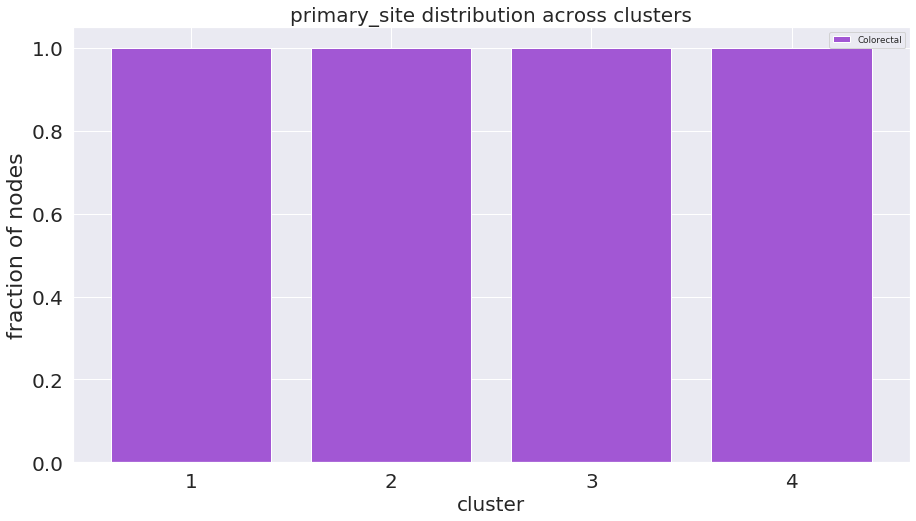

<class 'PermissionError'>
must shuffle files
True primary_site 1


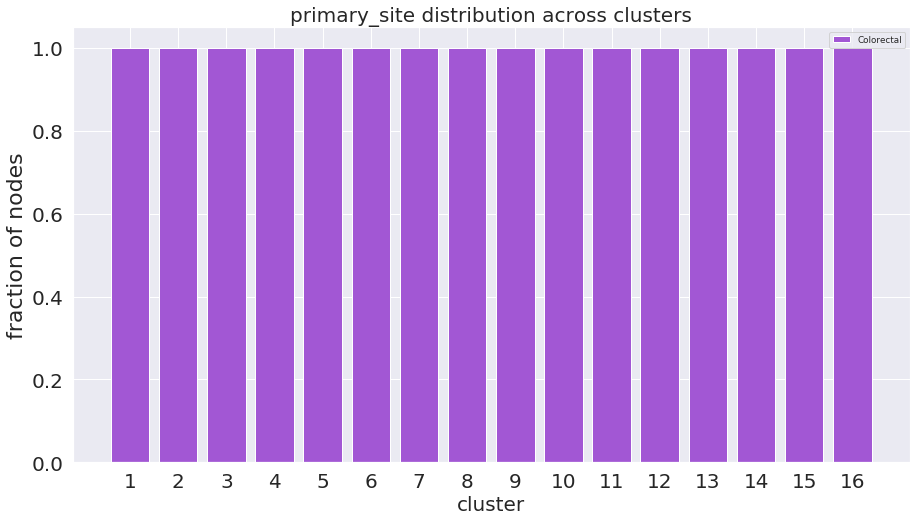

<class 'PermissionError'>
must shuffle files
True primary_site 0


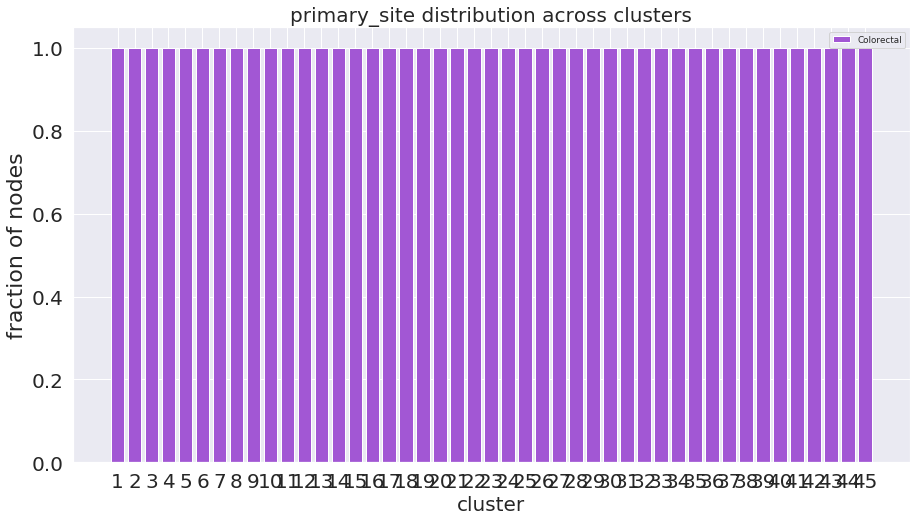

<class 'PermissionError'>
must shuffle files
True tcga_id 2


/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


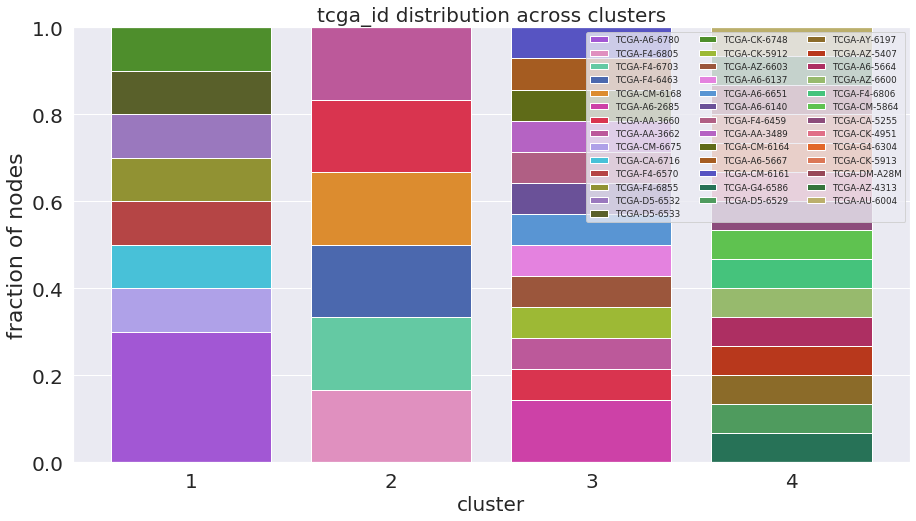

<class 'PermissionError'>
must shuffle files
True tcga_id 1


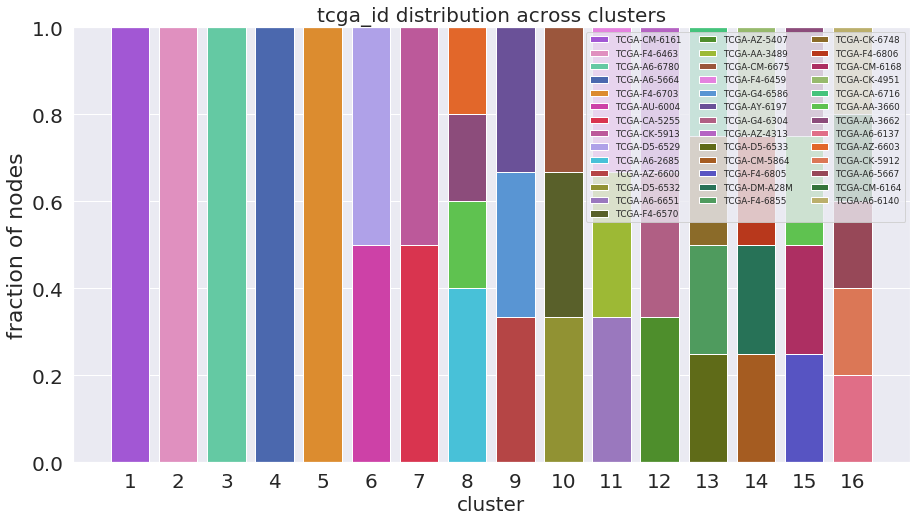

<class 'PermissionError'>
must shuffle files
True tcga_id 0


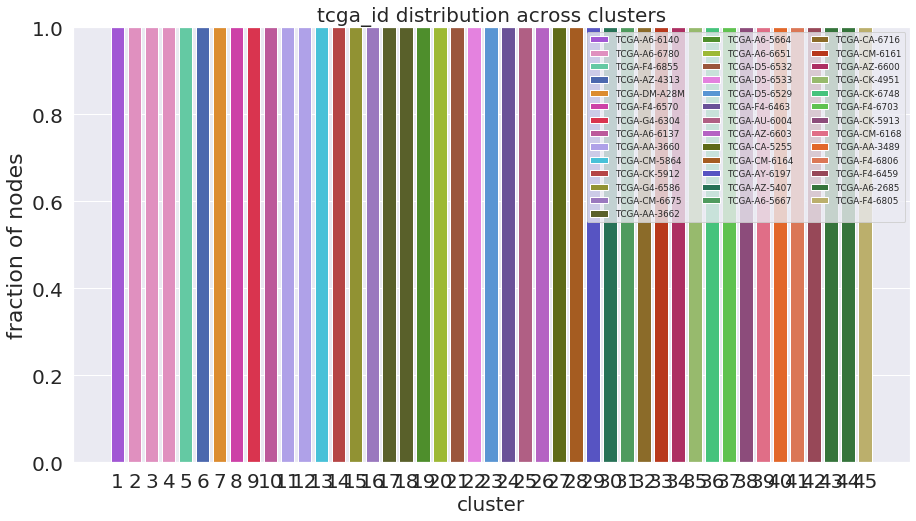

<class 'PermissionError'>
must shuffle files
True disease_type 2


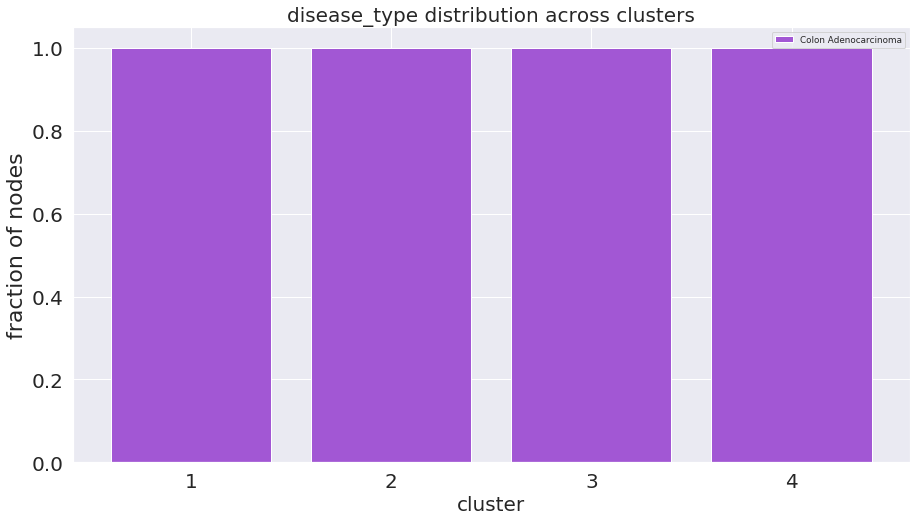

<class 'PermissionError'>
must shuffle files
True disease_type 1


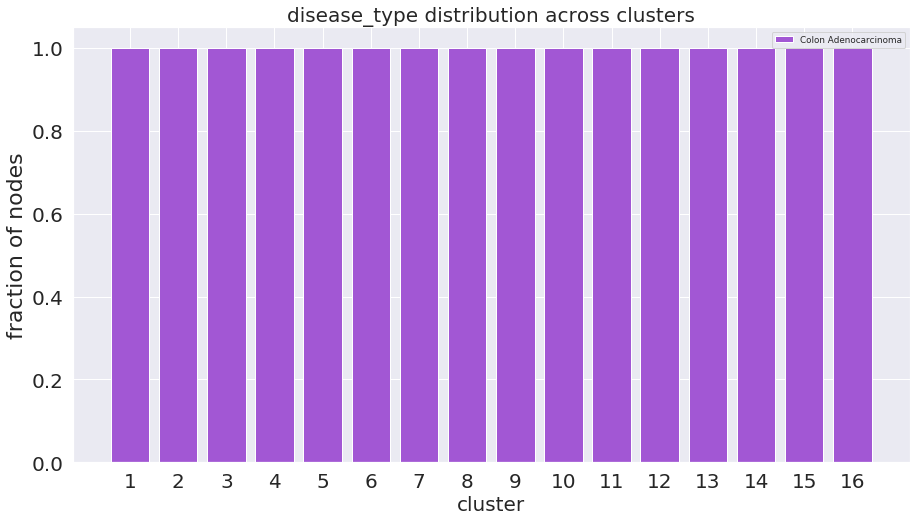

<class 'PermissionError'>
must shuffle files
True disease_type 0


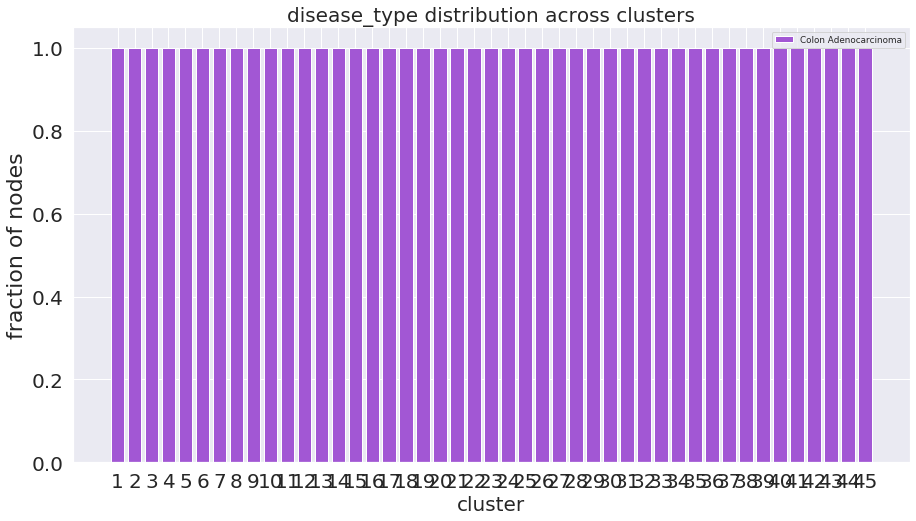

<class 'PermissionError'>
must shuffle files
True primary_diagnosis 2


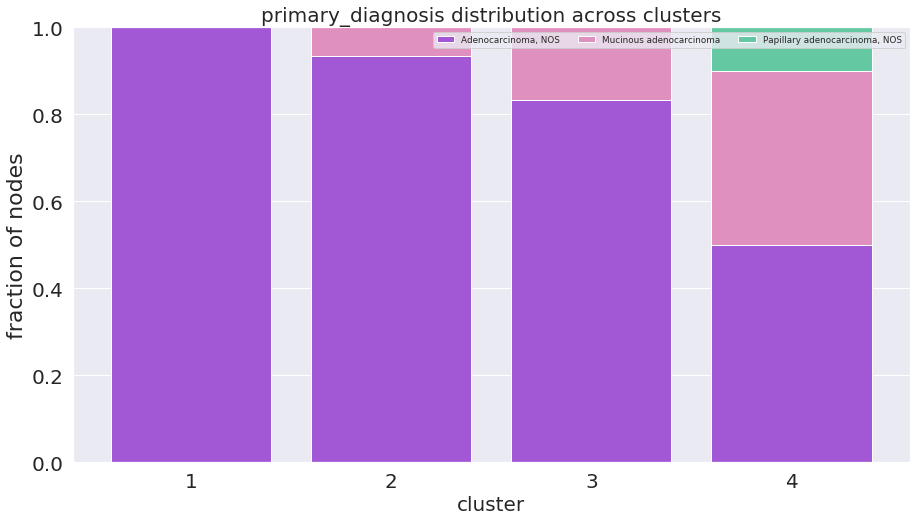

<class 'PermissionError'>
must shuffle files
True primary_diagnosis 1


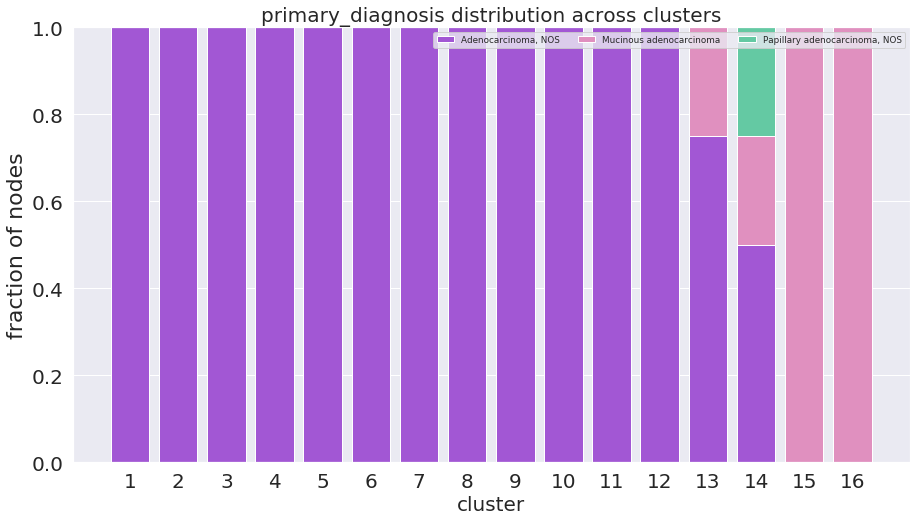

<class 'PermissionError'>
must shuffle files
True primary_diagnosis 0


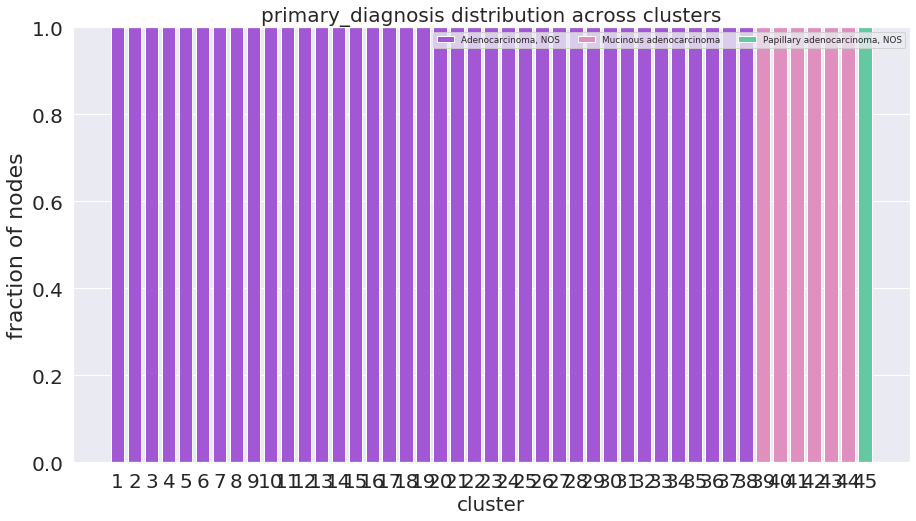

<class 'PermissionError'>
must shuffle files
False primary_site 2


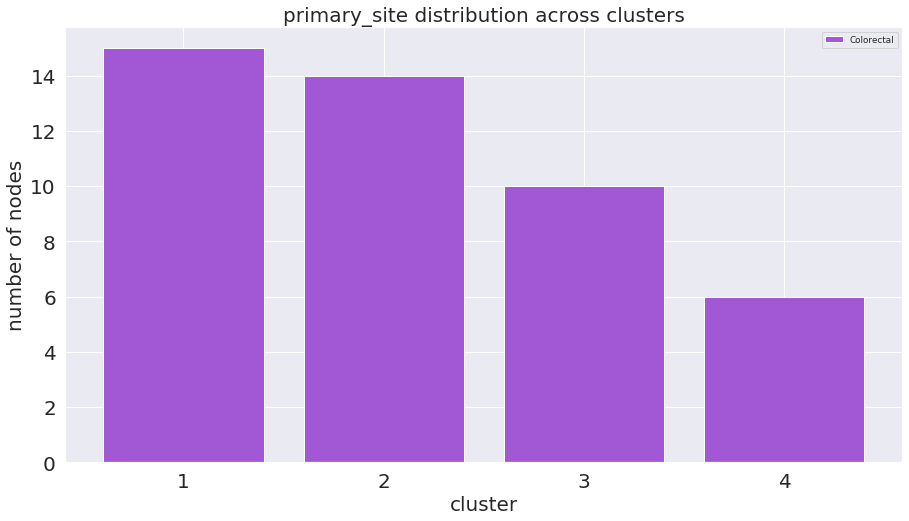

<class 'PermissionError'>
must shuffle files
False primary_site 1


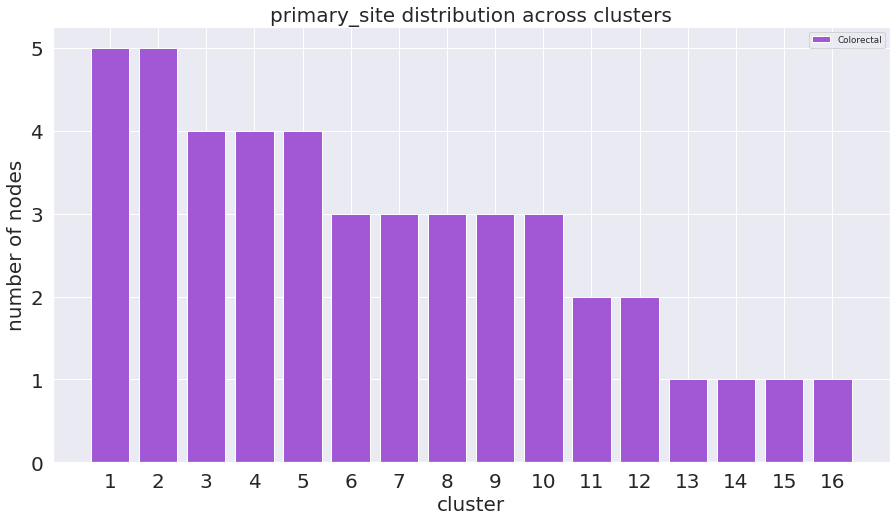

<class 'PermissionError'>
must shuffle files
False primary_site 0


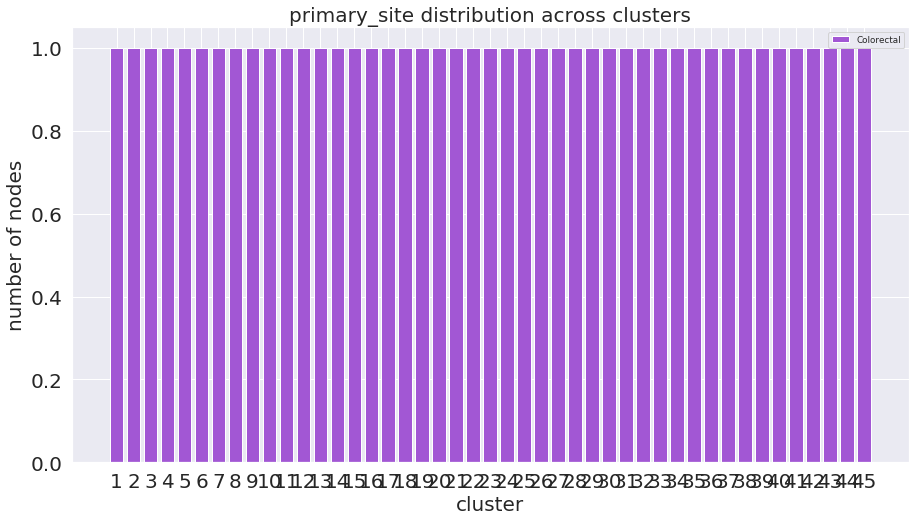

<class 'PermissionError'>
must shuffle files
False tcga_id 2


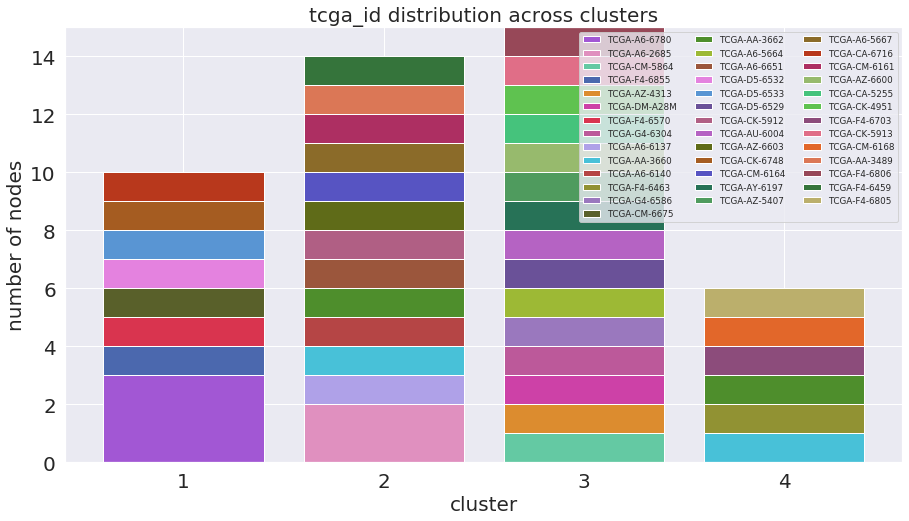

<class 'PermissionError'>
must shuffle files
False tcga_id 1


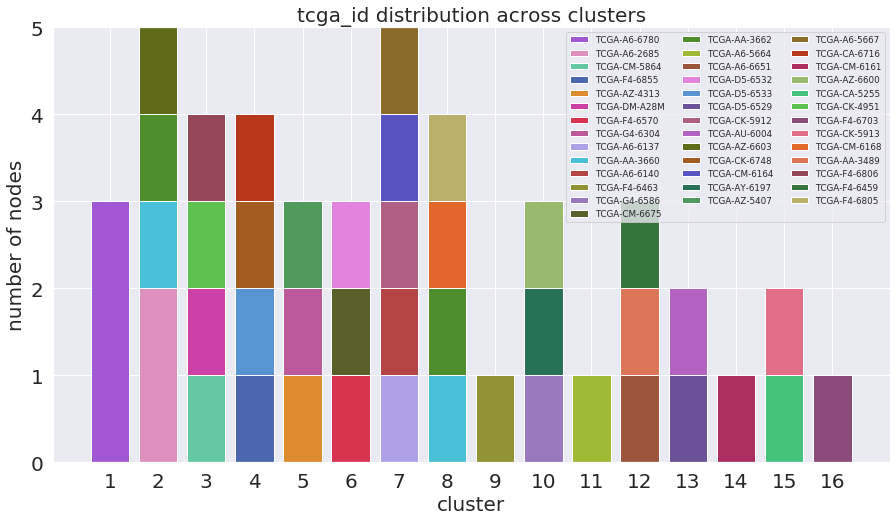

<class 'PermissionError'>
must shuffle files
False tcga_id 0


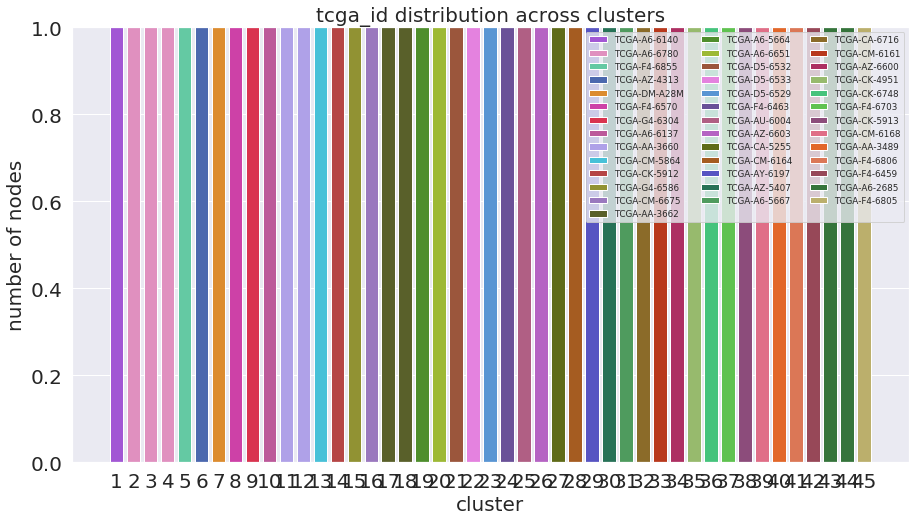

<class 'PermissionError'>
must shuffle files
False disease_type 2


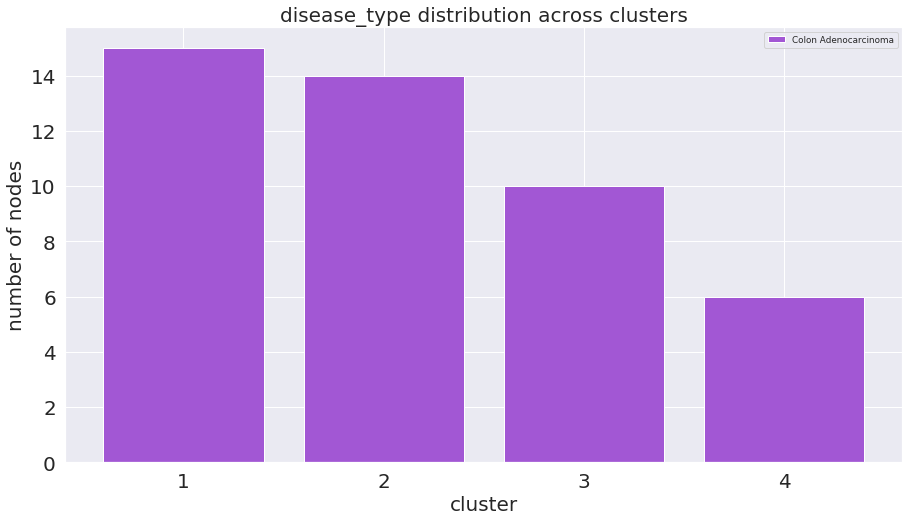

<class 'PermissionError'>
must shuffle files
False disease_type 1


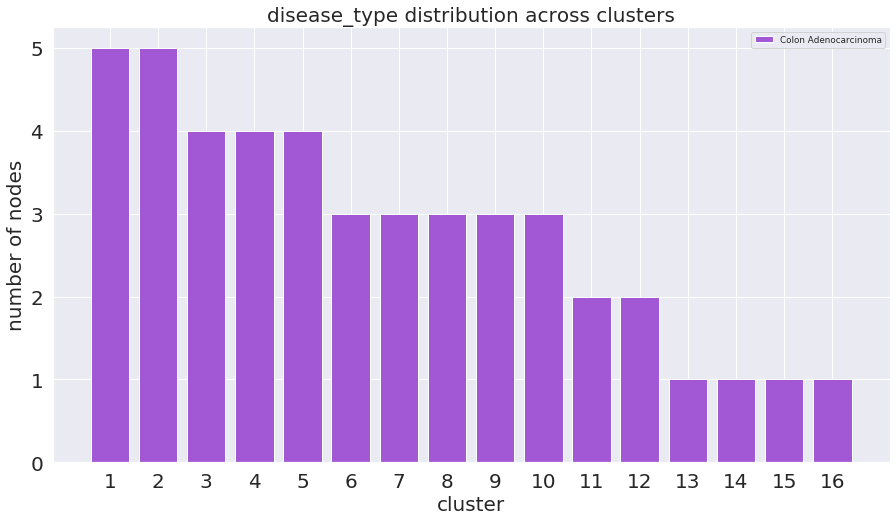

<class 'PermissionError'>
must shuffle files
False disease_type 0


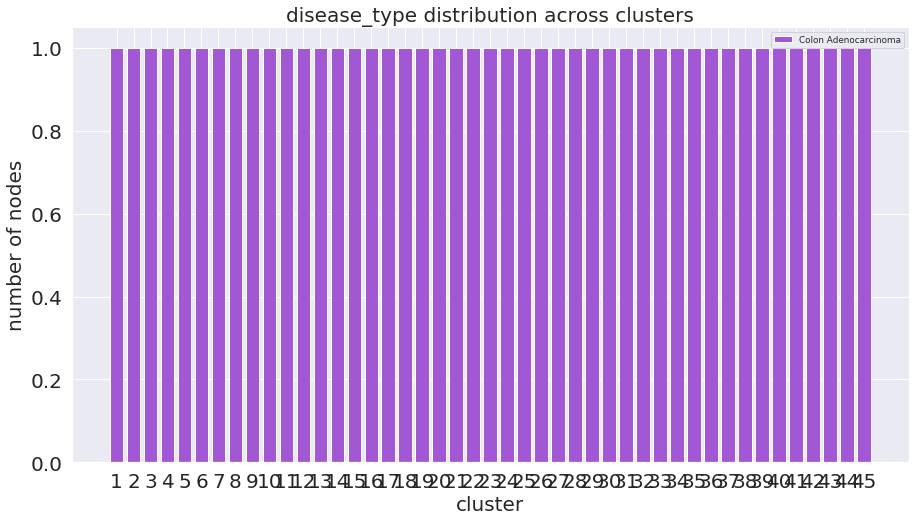

<class 'PermissionError'>
must shuffle files
False primary_diagnosis 2


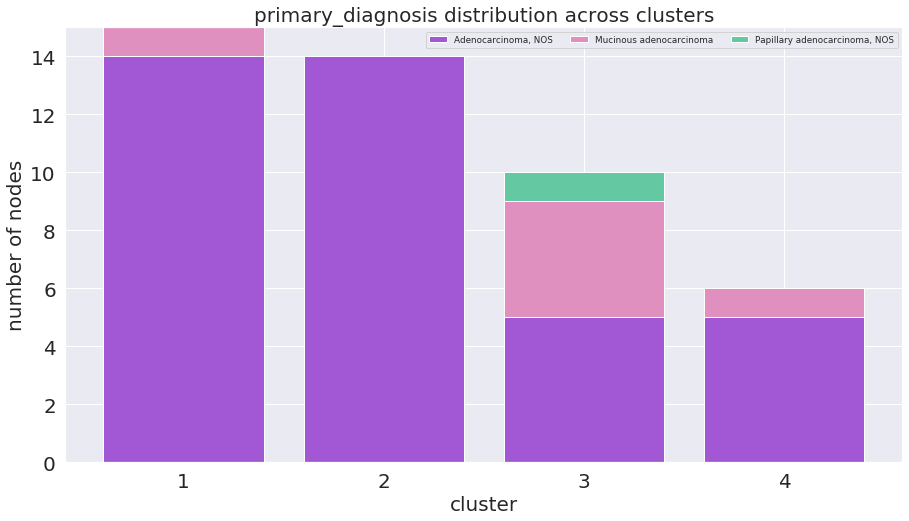

<class 'PermissionError'>
must shuffle files
False primary_diagnosis 1


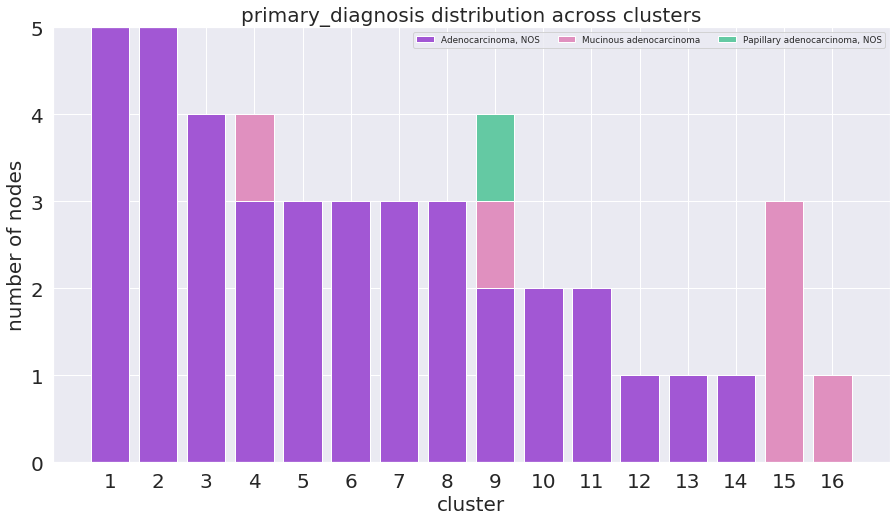

<class 'PermissionError'>
must shuffle files
False primary_diagnosis 0


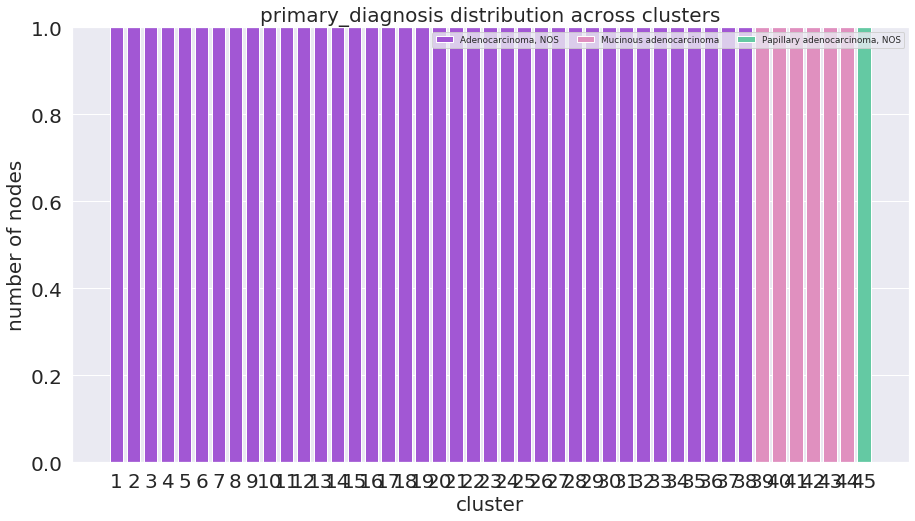

<class 'PermissionError'>
must shuffle files


In [22]:
for normalise in [True, False]:
    for label in labels:
        for level in np.arange(L+1)[::-1]:
            if level==0:
                pass
                #continue
            print(normalise, label, level)
            try:
                cluster = get_cluster_given_l(level, directory,algorithm=algorithm)
                fraction_sites = get_fraction_sites(cluster,df_files=df_files,label=label, normalise=normalise)

                #fsdf = pd.DataFrame(data=fraction_sites)
                #fsdf = fsdf.drop('Other', axis=1)
                #fsdf = fsdf.divide(fsdf.sum(axis=1), axis=0).fillna(0)
                #fraction_sites = fsdf.sort_values(by=fsdf.columns.to_list(), ascending=True).to_dict(orient='list')

                clustersinfo = get_clustersinfo(cluster,fraction_sites)
                plot_cluster_composition(fraction_sites,directory,level,label=label, normalise=normalise,algorithm=algorithm)
                make_heatmap(fraction_sites, directory, label, level, normalise=normalise,algorithm=algorithm)

                clustersinfo = get_clustersinfo(cluster,fraction_sites)            
                if not normalise:
                    plot_maximum(clustersinfo,cluster,label,level, directory,algorithm=algorithm)
                    plot_maximum_size(clustersinfo,label,level, directory,algorithm=algorithm)
                    plot_maximum_label(clustersinfo,label,level, directory,algorithm=algorithm)
                    plot_sizes(level,directory, algorithm=algorithm)
            except:
                print(sys.exc_info()[0])
            try:
                fraction_sites_shuffle = get_fraction_sites(cluster, pd.read_csv("%s/files.dat.shuf"%directory, index_col=[0]),label=label, normalise=normalise)
                clustersinfo_shuffle = get_clustersinfo(cluster, fraction_sites_shuffle)
                plot_cluster_composition(fraction_sites_shuffle,directory,level, label=label, shuffled=True, normalise=normalise)
                if not normalise:
                    plot_maximum(clustersinfo,cluster,label,level,directory,clustersinfo_shuffle,algorithm=algorithm)
                    plot_maximum_size(clustersinfo,label,level, directory,clustersinfo_shuffle,algorithm=algorithm)
                    plot_maximum_label(clustersinfo,label,level, directory,clustersinfo_shuffle,algorithm=algorithm)
                    plot_labels_size(clustersinfo,label,level, directory,clustersinfo_shuffle,algorithm=algorithm)
            except:
                print("must shuffle files")

In [ ]:
##useful for R clustree plot
def reindex(x):
    i=1
    last=x[0]
    new = []
    for xi in x:
        if xi == last:
            pass
        else:
            i+=1
            last=xi
        new.append(i)
    return new

df_clusters = pd.read_csv("%s/%s/%s_level_%d_clusters.csv"%(directory,algorithm,algorithm,L), header=[0])
df_labels = pd.DataFrame()
shape = df_clusters.dropna().shape
files = df_clusters.dropna().values.reshape(shape[0]*shape[1],)
for level in np.arange(L+1)[::-1]:
    print(level)
    df_clusters = pd.read_csv("%s/%s/%s_level_%d_clusters.csv"%(directory,algorithm,algorithm,level), header=[0])
    currentlevellabels = []
    for file in files:
        s = df_clusters[df_clusters.isin([file])].any(0)
        a = s.index[s]
        currentlevellabels.append(int(a[0][8:])-1)
    df_labels.insert(0,'l%d'%level,currentlevellabels)
    del currentlevellabels
filelabels = []
filesublabels = []
for file in files:
    filelabels.append(get_file(file, df_files)[labels[0]])
    filesublabels.append(get_file(file, df_files)[labels[1]])
df_labels.insert(0,'tissue', filelabels)
df_labels.insert(0,'subtissue', filesublabels)
df_labels.sort_values(by=['tissue','subtissue'], inplace=True)
df_labels.sort_values(by=["l%d"%l for l in np.arange(L+1)[::-1]], axis=0, inplace=True)
filelabels = df_labels['tissue']
filesublabels = df_labels['subtissue']
df_labels = df_labels.apply(reindex, axis=0)
df_labels['tissue']=filelabels
df_labels['subtissue']=filesublabels
df_labels.to_csv("%s/%s/topsbm_labels.csv"%(directory,algorithm), index=False, header=True)

In [ ]:
try:
    xl = getclustersizesarray(directory, L)
    with open("%s/clustersizes.txt" % directory, 'w') as f:
        for x in xl:
            f.write("%d\n" % x)
except:
    print("cannot save clustersizes.txt")

try:
    tl = gettopicsizesarray(directory, L)
    with open("%s/topicsizes.txt" % directory, 'w') as f:
        for x in tl:
            f.write("%d\n" % x)
except:
    print("cannot save topicsizes.txt")

In [11]:
scores = get_scores(directory, labels, l=L, verbose=False)
scores['hsbm'] = scores['primary_site']

In [16]:
try:
    xl = [len(get_cluster_given_l(li,directory)) for li in np.linspace(0,L,L+1)]
except:
    xl = [2,10,100,500]
with open("%s/clustersizes.txt"%directory,'w') as f:
    for x in xl:
        f.write("%d\n"%x)

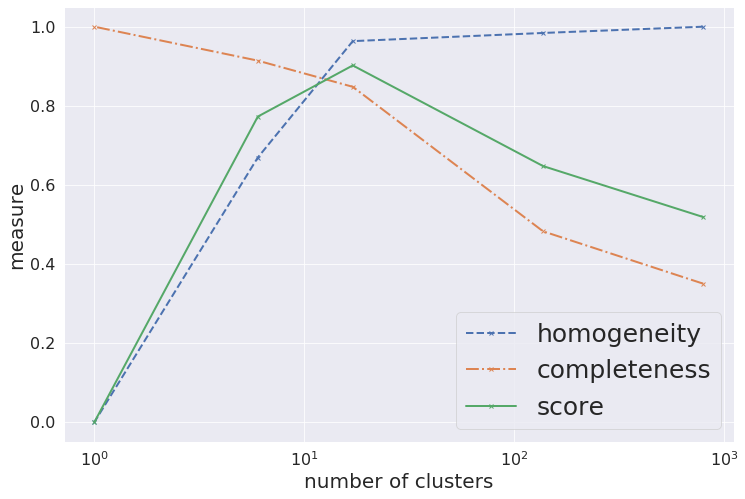

In [13]:
fig=plt.figure(figsize=(12,8))
ax = fig.subplots(1)
#add_score_lines(ax,scores,[labels[0]],xl, h=True, c=True, alpha=1)
h = np.array(scores['hsbm']['h'])
c = np.array(scores['hsbm']['c'])
ax.plot(xl,h, marker='x', ls='--', lw=2, label='homogeneity')
ax.plot(xl,c, marker='x', ls='-.', lw=2,label='completeness')
ax.plot(xl,scores['hsbm']['V'], marker='x', ls='-', lw=2, label='score')
ax.set_xscale('log')
#ax.plot(xl, 2*h*c/(h+c), ls='-',c='g')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=25)
plt.xlabel('number of clusters', fontsize=20)
plt.ylabel('measure', fontsize=20)
plt.show()
fig.savefig("%s/metric_scores_primarysite.pdf"%(directory))

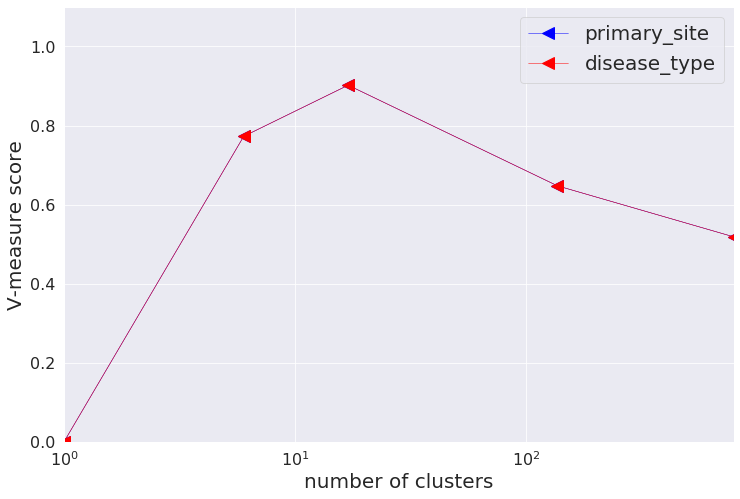

In [14]:
fig=plt.figure(figsize=(12,8))
ax = fig.subplots(1)
add_score_lines(ax,scores,labels,xl)
#h = np.array(scores['primary_site']['h'])
#c = np.array(scores['secondary_site']['c'])
#ax.plot(xl, 2*h*c/(h+c), ls='-',c='g')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
fig.savefig("%s/metric_scores.pdf"%(directory))

In [15]:
h = np.array(scores[labels[0]]['h'])
c = np.array(scores[labels[1]]['c'])
scores['hSBM'] = {
    'h':h,
    'c':c,
    'V':2*h*c/(h+c)
}

In [16]:
scores['hierarchical'] = pd.read_csv("%s/hierarchical.scores"%directory).to_dict(orient='list')
scores['lda'] = pd.read_csv("%s/lda.scores"%directory).to_dict(orient='list')
#scores['hsbm->hierachical'] = pd.read_csv("%s/hierhsbm.scores"%directory).to_dict(orient='list')
scores['hsbm'] = scores['primary_site']

In [17]:
scores['lda'] = pd.read_csv("%s/lda.scores"%directory).to_dict(orient='list')

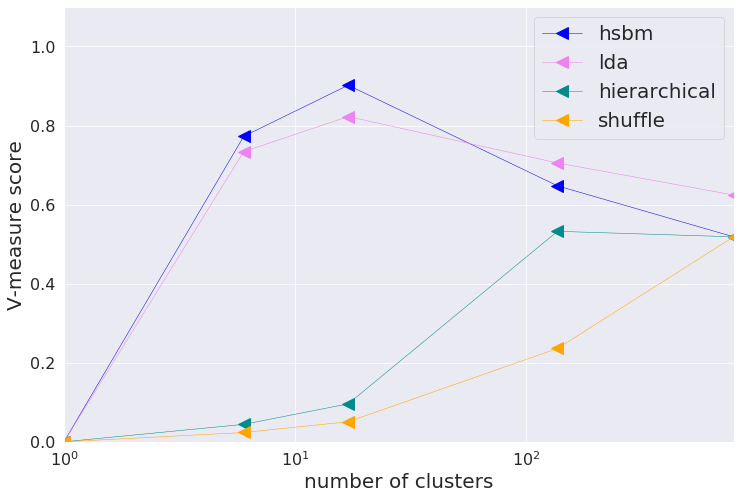

In [18]:
fig=plt.figure(figsize=(12,8))
ax = fig.subplots(1)
add_score_lines(ax,scores,labels=['hsbm', 'lda', 'hierarchical', 'shuffle'],xl=xl)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
fig.savefig("%s/metric_scores_all.pdf"%(directory))

In [9]:
X = pd.read_csv("%s/mainTable.csv"%directory, delimiter=',', index_col=0).transpose()

In [10]:
X = X.parallel_apply(lambda x: x/np.sum(x).astype(float), axis=1)

Process ForkPoolWorker-11:
Process ForkPoolWorker-4:
Process ForkPoolWorker-7:
Process ForkPoolWorker-9:
Process ForkPoolWorker-5:
Process ForkPoolWorker-10:
Process ForkPoolWorker-12:
Process ForkPoolWorker-6:
Process ForkPoolWorker-8:
Process ForkPoolWorker-1:
Process ForkPoolWorker-3:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/multiprocess/process.py", line 258, in _bootstrap
    self.run()
  File "/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/multiprocess/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/multiprocess/process.py", line 258, in _bootstrap
    self.run

  File "/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/multiprocess/synchronize.py", line 101, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
  File "/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/multiprocess/synchronize.py", line 101, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
Process ForkPoolWorker-2:
Traceback (most recent call last):
  File "/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/multiprocess/process.py", line 258, in _bootstrap
    self.run()
  File "/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/multiprocess/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/multiprocess/pool.py", line 108, in worker
    task = get()
  File "/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/multiprocess/queues.py", line 338, in get
    res = self._reader.r

In [11]:
def update_keys(scores_container):
    if 'topsbm' in scores_container.keys():
        scores_container['hsbm']=scores_container['topsbm']
        scores_container.pop('topsbm')
    if 'hiersbm' in scores_container.keys():
        scores_container['hierhsbm']=scores_container['hsbm->hierachical']
        scores_container.pop('hierhsbm')

In [71]:
x=np.array([1,2,0])
y=np.array([0,2,0])
np.log(np.true_divide(y,x, where=x!=0))

/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


array([-inf,   0., -inf])

In [85]:
from scipy.stats import entropy
def kl(x,y):
    xoy = np.true_divide(x,y, where=y!=0)
    yox = np.true_divide(y,x,where=x!=0)
    return (np.dot(x,np.log(xoy, where=xoy>0))+np.dot(y,np.log(yox, where=yox>0)))/2.

In [87]:
silhouettes = {}
algorithms = ['topsbm', 'lda', 'hierarchical']
#algorithms = ['topsbm', 'lda']
selected_metrics = np.concatenate(([*metrics.pairwise.PAIRWISE_DISTANCE_FUNCTIONS.keys()],['correlation']))
for algorithm in algorithms:
    for metric in [kl]:
        key = algorithm+'_'+'kl'
        print(key)
        silhouettes[key]={}
        silhouettes[key]['data']=[]
        silhouettes[key]['labels']=[]
        silhouettes[key]['samples']=[]
        for level in np.arange(L+1):
            try:
                cluster = get_cluster_given_l(level, directory, algorithm=algorithm)
            except:
                print(sys.exc_info()[1])
                continue
            predicted_labels = []
            for c in cluster:
                for sample in cluster[c]:
                    try:
                        predicted_labels.append([get_file(sample,df_files).name,c])
                    except:
                        print(sys.exc_info()[0])
                        print("error searching %s in %s" % (label,sample))
            predicted_labels=np.array(predicted_labels)
            predicted_labels=pd.DataFrame(data=predicted_labels, columns=[0,'label']).set_index(0).sort_index()
            labs =predicted_labels['label'].ravel().astype(int)
            X_values = X[X.index.isin(predicted_labels.index)].sort_index().values
            try:
                silhouettes[key]['data'].append((metrics.silhouette_score(X_values, labs, metric=metric)))
                silhouettes[key]['samples'].append(metrics.silhouette_samples(X_values, labs, metric=metric))
                silhouettes[key]['labels'].append(labs)
            except:
                print(sys.exc_info()[1])
                silhouettes[key]['data'].append(np.nan)
                silhouettes[key]['samples'].append(np.nan)
                silhouettes[key]['labels'].append(np.nan)
update_keys(silhouettes)

topsbm_kl
Number of labels is 793. Valid values are 2 to n_samples - 1 (inclusive)
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
lda_kl
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
hierarchical_kl
Number of labels is 793. Valid values are 2 to n_samples - 1 (inclusive)
Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)


In [29]:
fig=plt.figure(figsize=(12,8))
for k in ["%s_euclidean"%a for a in algorithms]:
    plt.plot(xl,np.array(silhouettes[k]['data']), lw=2, ms=14, marker='x', label=k)
plt.ylabel("Silhouette", fontsize=20)
plt.xlabel("Number of clusters", fontsize=20)
plt.title("Silhouette score [correlation]", fontsize=20)
plt.ylim((-1.1,1.1))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xscale('log')
plt.legend(loc='best', fontsize=20)
plt.show()
fig.savefig("%s/silhouette.pdf"%directory)

KeyError: 'topsbm_euclidean'

<Figure size 864x576 with 0 Axes>

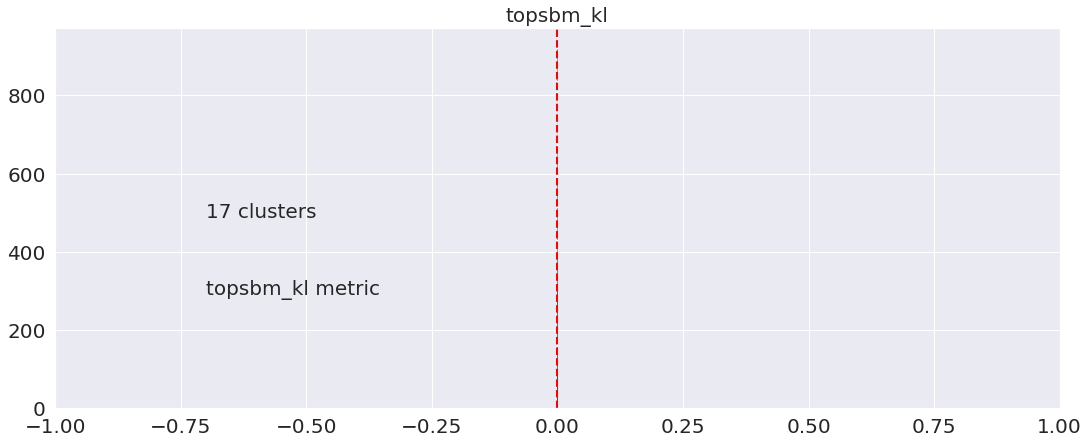

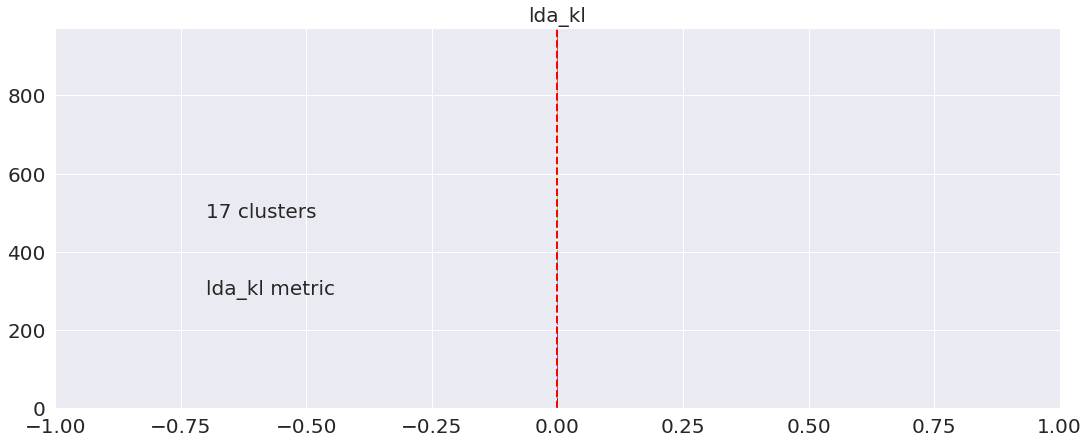

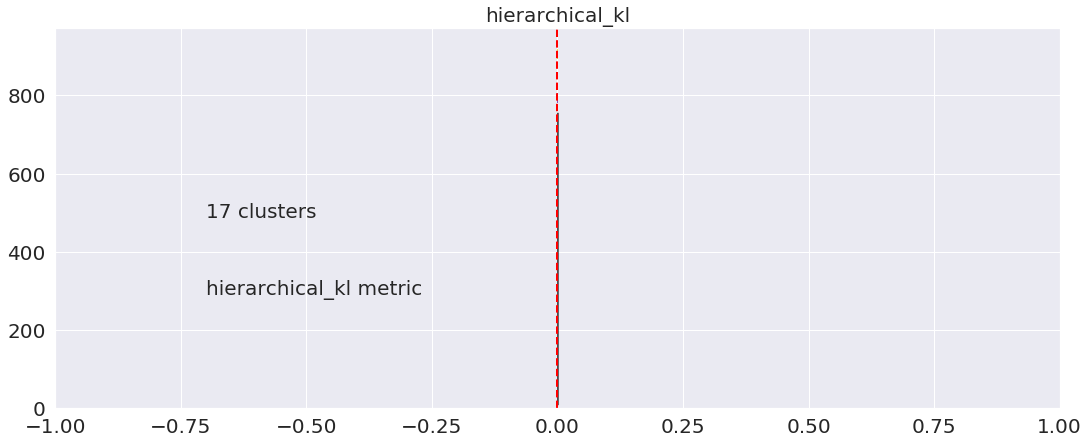

In [41]:
for k in silhouettes.keys():
    # Aggregate the silhouette scores for samples belonging to
    sample_silhouette_values = silhouettes[k]['samples'][2]
    cluster_labels = silhouettes[k]['labels'][2]
    silhouette_avg = silhouettes[k]['data'][2]

    n_clusters=np.max(cluster_labels)+1#labels have 0
    if n_clusters!=n_clusters:
        continue
    y_lower = 10

    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    for i in range(n_clusters):
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title(k, fontsize=20)
    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.7, 0.5*y_lower, "%d clusters"%n_clusters, fontsize=20)
    ax.text(-0.7, 0.3*y_lower, "%s metric"%k, fontsize=20)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--", lw=2)
    plt.tick_params(labelsize=20)
    plt.show()
    fig.savefig("%s/silhouette_%s.pdf"%(directory,k))

In [22]:
silhouettes.keys()

dict_keys(['topsbm_cityblock', 'topsbm_cosine', 'topsbm_euclidean', 'topsbm_haversine', 'topsbm_l2', 'topsbm_l1', 'topsbm_manhattan', 'topsbm_precomputed', 'lda_cityblock', 'lda_cosine', 'lda_euclidean', 'lda_haversine', 'lda_l2', 'lda_l1', 'lda_manhattan', 'lda_precomputed', 'hierarchical_cityblock', 'hierarchical_cosine', 'hierarchical_euclidean', 'hierarchical_haversine', 'hierarchical_l2', 'hierarchical_l1', 'hierarchical_manhattan', 'hierarchical_precomputed'])

# Benchmark
https://scikit-learn.org/stable/modules/clustering.html

In [ ]:
true_labels = []
predicted_labels = []
for c in cluster:
    print(c)
    for sample in cluster[c]:
        #true_labels.append(getFile(sample)['primary_site'].values[0])
        try:
            true_labels.append(df_files.loc[sample][label])
            predicted_labels.append(c)
        except:
            print("error in %s"%sample)

In [ ]:
_, labels_true = np.unique(true_labels,return_inverse=True)

In [ ]:
series_metrics=pd.Series(name=setup+'__level_%d_%s'%(level,label))
series_metrics['MI']=metrics.cluster.normalized_mutual_info_score(labels_true, predicted_labels, average_method='arithmetic')
series_metrics['Homogeneity']=metrics.cluster.homogeneity_score(labels_true, predicted_labels) 
series_metrics['Completness']=metrics.cluster.completeness_score(labels_true, predicted_labels) 
series_metrics['Vmeasure']=metrics.cluster.v_measure_score(labels_true, predicted_labels)
series_metrics['Fowlkes-Mallows']=metrics.cluster.fowlkes_mallows_score(labels_true,predicted_labels)
series_metrics['AdjustedRandIndex']=metrics.cluster.adjusted_rand_score(labels_true,predicted_labels)

In [ ]:
series_metrics

In [ ]:
#df_metrics = pd.DataFrame(columns=['AdjustedRandIndex','MI','Homogeneity','Completness','Vmeasure','Fowlkes-Mallows'])

In [ ]:
try:
    df_metrics.append(series_metrics, ignore_index=False, verify_integrity=True).to_csv("results/hSBM/metrics.csv", index=True,header=True)
except:
    raise

In [ ]:
df_metrics = pd.read_csv("results/hSBM/metrics.csv", index_col=[0],header=[0])
df_metrics.sort_values(by=['MI','Homogeneity'], ascending=False, axis=0, inplace=True)
df_metrics.round(decimals=2)

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(24, 20)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = pd.plotting.table(ax, df_metrics.round(decimals=2), loc='upper right', colWidths=[0.12]*len(df_metrics.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1, 2) # change size table
plt.savefig('results/hSBM/metrics.pdf', transparent=True)

In [ ]:
metrics.cluster.contingency_matrix(true_labels, predicted_labels)

In [ ]:
df_files[df_files['primary_site']=='Brain']